<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Optimizaci%C3%B3n_Clasificaci%C3%B3n_y_Optimizaci%C3%B3n_de_Hiperpar%C3%A1metros_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación y Optimización de Hiperparámetros (Core)**
**Objetivo:** Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

**Dataset:** [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)


**Descripción del Dataset:** El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

**Instrucciones:**

1.  **Carga y Exploración Inicial de Datos:**
* Cargar el dataset desde Kaggle.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar los valores faltantes y outliers en el dataset.
2.  **Preprocesamiento de Datos:**
* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.
3.  **Implementación de Modelos de Clasificación:**
* Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
4.  **Optimización de Hiperparámetros:**
* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
* Implementar RandomizedSearchCV como método alternativo de optimización.
Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.
5.  **Evaluación de Modelos:**
* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Generar y analizar la matriz de confusión para los modelos optimizados.
* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Exploración de Datos ===
Dimensiones del dataset: (1338, 7)

Primeras 5 filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Últimas 5 filas del dataset:
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0   

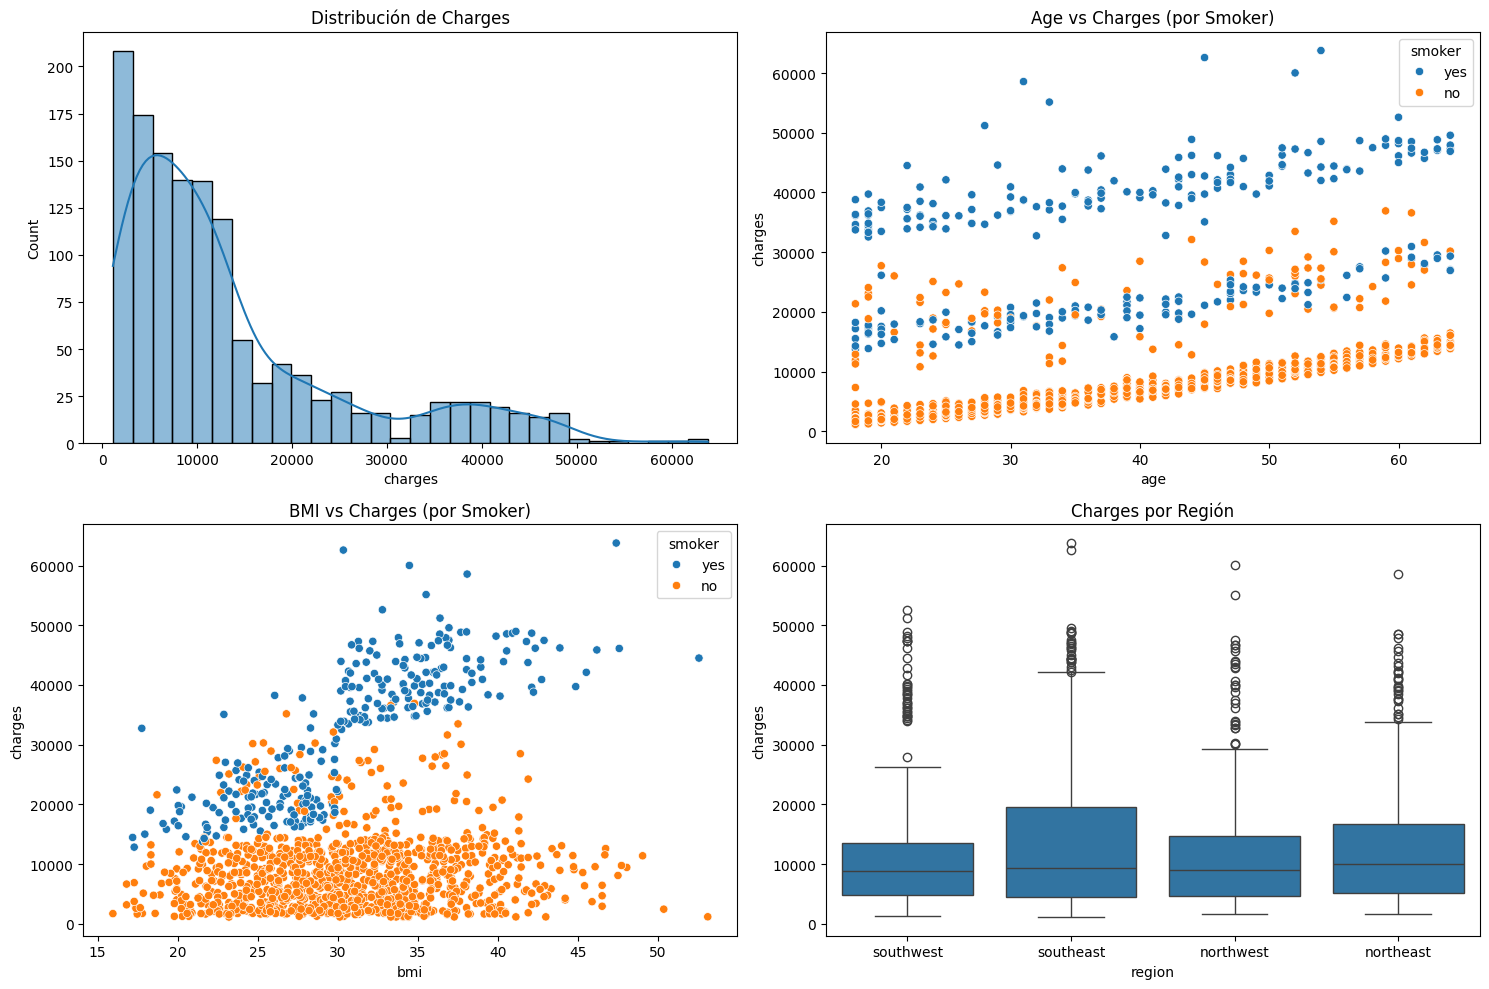

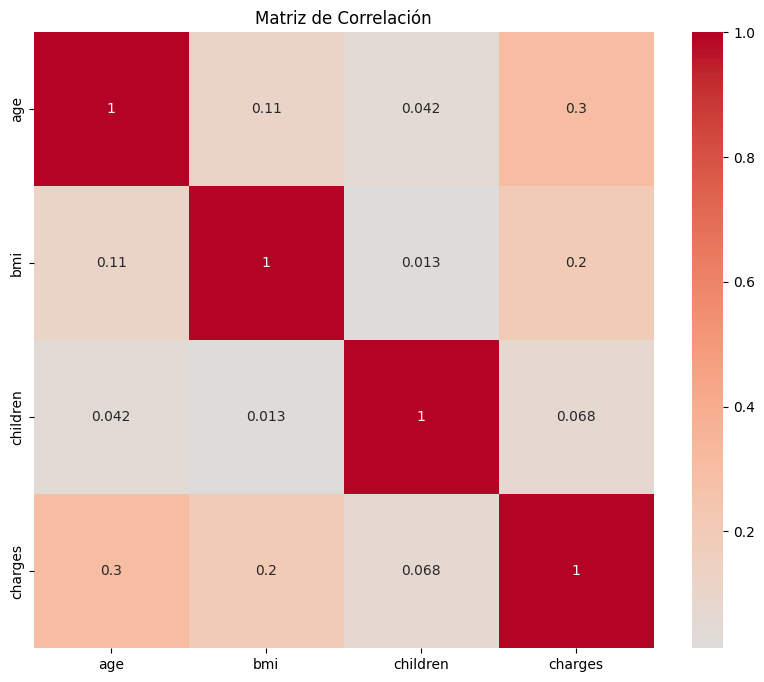


=== Preprocesamiento de Datos ===
Valores nilos después del preprocesamiento:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

=== Entrenamiento y Evaluación Inicial ===

Matriz de Confusión para Logistic Regression:
[[131  15]
 [  9 113]]

Matriz de Confusión para Decision Tree:
[[126  20]
 [ 12 110]]

Matriz de Confusión para KNN:
[[130  16]
 [ 14 108]]


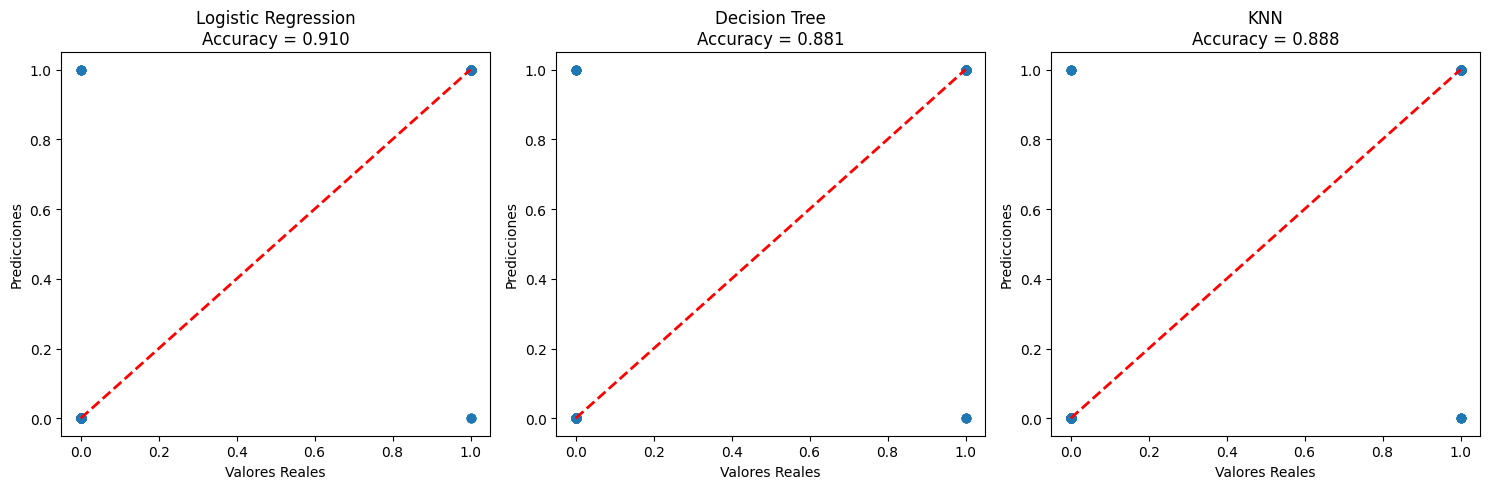


Resultados iniciales:
                     Accuracy Precision    Recall  F1-Score   ROC-AUC  \
Logistic Regression  0.910448  0.882812   0.92623     0.904   0.95896   
Decision Tree        0.880597  0.846154  0.901639  0.873016  0.882327   
KNN                   0.88806  0.870968  0.885246  0.878049   0.93743   

                    CV_Accuracy_mean CV_Accuracy_std        Confusion Matrix  
Logistic Regression         0.907312        0.026996   [[131, 15], [9, 113]]  
Decision Tree                0.88491        0.022773  [[126, 20], [12, 110]]  
KNN                         0.888594         0.03165  [[130, 16], [14, 108]]  


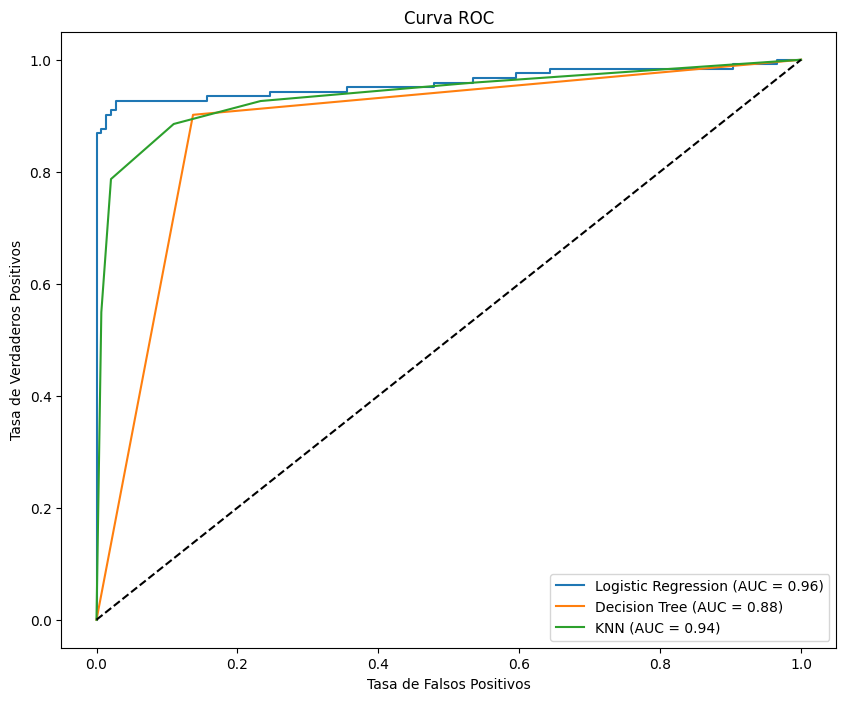


=== Optimización de Hiperparámetros ===

Optimizando Logistic Regression...

Resultados para Logistic Regression:
GridSearchCV:
Mejor score: 0.9118
Mejores parámetros: {'classifier__C': 100, 'classifier__solver': 'liblinear'}

RandomizedSearchCV:
Mejor score: 0.9118
Mejores parámetros: {'classifier__solver': 'liblinear', 'classifier__C': 100}

Optimizando Decision Tree...

Resultados para Decision Tree:
GridSearchCV:
Mejor score: 0.9275
Mejores parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_features': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 15}

RandomizedSearchCV:
Mejor score: 0.9230
Mejores parámetros: {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 6, 'classifier__max_features': None, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'}

Optimizando KNN...

Resultados para KNN:
GridSearchCV:
Mejor score: 0.9178
Mejores parámetros: {'classifier__metric': 'manhattan', 'classifi

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from google.colab import drive

# 1. Carga y Exploración Inicial de Datos:
drive.mount('/content/drive')
URL = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/insurance.csv"
df = pd.read_csv(URL)

def explore_data(df):
    print("Dimensiones del dataset:", df.shape)
    print("\nPrimeras 5 filas del dataset:")
    print(df.head())
    print("\nÚltimas 5 filas del dataset:")
    print(df.tail())
    print("\nInformación del dataset:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    print("\nValores faltantes:")
    print(df.isnull().sum())

    # Visualizaciones
    plt.figure(figsize=(15, 10))

    # Distribución de charges
    plt.subplot(2, 2, 1)
    sns.histplot(df['charges'], kde=True)
    plt.title('Distribución de Charges')

    # Age vs Charges
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
    plt.title('Age vs Charges (por Smoker)')

    # BMI vs Charges
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
    plt.title('BMI vs Charges (por Smoker)')

    # Charges por región
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='region', y='charges')
    plt.title('Charges por Región')

    plt.tight_layout()
    plt.show()

    # Matriz de correlación
    plt.figure(figsize=(10, 8))
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()

    return df

# 2. Preprocesamiento de Datos
def preprocess_data(df):
    # Convertir 'charges' en una variable categórica para clasificación
    df['charges'] = np.where(df['charges'] > df['charges'].median(), 1, 0)

    # Separar features y target
    X = df.drop('charges', axis=1)
    y = df['charges']

    # Identificar tipos de columnas
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Crear transformadores
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False))
    ])

    # Combinar transformadores
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Transformar los datos
    X = preprocessor.fit_transform(X)
    print(f'Valores nilos después del preprocesamiento:\n{pd.DataFrame(X).isnull().sum()}')

    return preprocessor, X, y

# 3. Implementación de Modelos de Clasificación
def train_and_evaluate_models(preprocessor, X, y):
    # Split de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definir modelos
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }

    # Crear pipelines
    pipelines = {name: Pipeline([
        # ('preprocessor', preprocessor),  # Remove preprocessor from here
        ('classifier', model)
    ]) for name, model in models.items()}

    # Entrenar y evaluar
    results = {}
    predictions = {}

    for name, pipeline in pipelines.items():
        # Entrenamiento
        pipeline.fit(X_train, y_train)  # Now X_train is already preprocessed

        # Predicciones
        y_pred = pipeline.predict(X_test)
        predictions[name] = y_pred

        # Métricas
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
        }

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        results[name]['CV_Accuracy_mean'] = cv_scores.mean()
        results[name]['CV_Accuracy_std'] = cv_scores.std()

        # Matriz de Confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        results[name]['Confusion Matrix'] = conf_matrix
        print(f"\nMatriz de Confusión para {name}:\n{conf_matrix}")

    # Visualizar predicciones vs valores reales
    plt.figure(figsize=(15, 5))
    for i, (name, y_pred) in enumerate(predictions.items(), 1):
        plt.subplot(1, 3, i)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title(f'{name}\nAccuracy = {results[name]["Accuracy"]:.3f}')
    plt.tight_layout()
    plt.show()

    return pipelines, results

# Función para generar y visualizar la curva ROC
def plot_roc_curve(pipelines, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, pipeline in pipelines.items():
        fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='best')
    plt.show()

def optimize_models(pipelines, X, y):
    # Parámetros para cada modelo
    param_grids = {
        'Logistic Regression': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'saga']
        },
        'Decision Tree': {
            'classifier__criterion': ['log_loss', 'gini'],
            'classifier__max_depth': [3, 5, 7, 10],
            'classifier__min_samples_split': [5, 10, 15],
            'classifier__min_samples_leaf': [2, 4, 6],
            'classifier__max_features': [None, 'sqrt']
        },
        'KNN': {
            'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    }

    optimization_results = {}

    for name, pipeline in pipelines.items():
        if param_grids[name]:
            print(f"\nOptimizando {name}...")

            # GridSearchCV
            grid_search = GridSearchCV(
                pipeline,
                param_grids[name],
                cv=5,
                scoring='accuracy',
                n_jobs=-1,
                error_score='raise'
            )
            grid_search.fit(X, y)

            # RandomizedSearchCV
            random_search = RandomizedSearchCV(
                pipeline,
                param_grids[name],
                n_iter=8,
                cv=5,
                scoring='accuracy',
                n_jobs=-1,
                random_state=42,
                error_score='raise'
            )
            random_search.fit(X, y)

            optimization_results[name] = {
                'GridSearch_best_score': grid_search.best_score_,
                'GridSearch_best_params': grid_search.best_params_,
                'RandomSearch_best_score': random_search.best_score_,
                'RandomSearch_best_params': random_search.best_params_
            }

            # Imprimir resultados
            print(f"\nResultados para {name}:")
            print("GridSearchCV:")
            print(f"Mejor score: {grid_search.best_score_:.4f}")
            print("Mejores parámetros:", grid_search.best_params_)
            print("\nRandomizedSearchCV:")
            print(f"Mejor score: {random_search.best_score_:.4f}")
            print("Mejores parámetros:", random_search.best_params_)

    return optimization_results

def run_pipeline(df):
    print("=== Exploración de Datos ===")
    df = explore_data(df)

    print("\n=== Preprocesamiento de Datos ===")
    preprocessor, X, y = preprocess_data(df)

    print("\n=== Entrenamiento y Evaluación Inicial ===")
    pipelines, initial_results = train_and_evaluate_models(preprocessor, X, y)
    print("\nResultados iniciales:")
    print(pd.DataFrame(initial_results).T)

    # Split de datos FUERA de train_and_evaluate_models
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Visualizar curva ROC
    plot_roc_curve(pipelines, X_test, y_test)

    print("\n=== Optimización de Hiperparámetros ===")
    optimization_results = optimize_models(pipelines, X, y)
    print("\nResultados de optimización:")
    print(pd.DataFrame(optimization_results).T)

    # Return the results
    return initial_results, optimization_results

# Ejecutar el pipeline
initial_results, optimization_results = run_pipeline(df)

# **Explicación de los Gráficos**

1. **Distribución de Charges**

Este histograma muestra la distribución de los cargos médicos.

La mayoría de los cargos se encuentran en el rango de 0 a 20,000.

La frecuencia de los cargos disminuye a medida que los cargos aumentan.

Hay algunos valores atípicos que alcanzan hasta 60,000.

2. **Age vs Charges (por Smoker)**

Este gráfico de dispersión muestra la relación entre la edad y los cargos médicos, diferenciando entre fumadores (puntos azules) y no fumadores (puntos naranjas).

Los fumadores tienden a tener cargos más altos en comparación con los no fumadores, independientemente de la edad.

Hay una clara tendencia a que los fumadores incurran en costos médicos más elevados.

3. **BMI vs Charges (por Smoker)**

Este gráfico de dispersión muestra la relación entre el índice de masa corporal (BMI) y los cargos médicos, también diferenciando entre fumadores y no fumadores.

Al igual que en el gráfico anterior, los fumadores tienden a tener cargos más altos.

A medida que el BMI aumenta, los cargos también tienden a aumentar, especialmente para los fumadores.

4. **Charges por Región**

Este diagrama de caja muestra la distribución de los cargos médicos en diferentes regiones (suroeste, sureste, noroeste y noreste).

Las cajas representan el rango intercuartílico, y las líneas horizontales dentro de las cajas representan la mediana.

Se observan algunos valores atípicos en todas las regiones, pero especialmente en el sureste y noreste.

Las medianas de los cargos varían ligeramente entre las regiones, pero todas las regiones presentan valores atípicos que indican casos con cargos significativamente más altos.

# **Gráficos de Predicciones vs Valores Reales**

**Gráfico de Predicciones vs Valores Reales para Logistic Regression**

Este gráfico muestra las predicciones realizadas por el modelo de regresión logística en comparación con los valores reales.

La mayoría de las predicciones se alinean bien con la diagonal roja (línea de referencia donde predicciones = valores reales), indicando que el modelo está haciendo un buen trabajo al predecir los cargos.

**Gráfico de Predicciones vs Valores Reales para Decision Tree**

Este gráfico muestra las predicciones realizadas por el modelo de árbol de decisión en comparación con los valores reales.

Aunque el modelo hace un buen trabajo en general, se observa una mayor dispersión en torno a la línea de referencia, lo que sugiere que el modelo puede tener más errores en ciertas predicciones.

**Gráfico de Predicciones vs Valores Reales para KNN**

Este gráfico muestra las predicciones realizadas por el modelo K-Nearest Neighbors en comparación con los valores reales.

El modelo KNN también se comporta bien, pero con cierta dispersión alrededor de la línea de referencia, similar al árbol de decisión.

# **Curva ROC**

La Curva ROC (Receiver Operating Characteristic) compara el rendimiento de los tres modelos: Logistic Regression, Decision Tree y KNN.

**Logistic Regression:** AUC = 0.96, lo que indica un excelente rendimiento en distinguir entre clases.

**Decision Tree:** AUC = 0.88, lo que muestra un buen rendimiento, pero no tan bueno como Logistic Regression.

**KNN:** AUC = 0.94, lo que indica un rendimiento muy bueno, ligeramente inferior a Logistic Regression.

# **Conclusión**
Estos gráficos proporcionan una visión clara de cómo los diferentes factores (edad, BMI, hábito de fumar y región) afectan los cargos médicos y cómo los diferentes modelos de clasificación se desempeñan en la predicción de estos cargos. En general, la Regresión Logística parece ser el modelo más preciso, seguido de cerca por KNN y luego el Árbol de Decisión.